In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [101]:
data = pd.read_csv("Sample_data.csv")

In [102]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [48]:
data.isnull().sum()

x    0
y    1
dtype: int64

## Data Processing

We have only i row which has null value ,
So we drop the row.

In [49]:
data = data.dropna()
print("Shape of data is :",data.shape)

Shape of data is : (699, 2)


In [50]:
data.isnull().sum()

x    0
y    0
dtype: int64

### Splitting data

In [51]:
# Training input and output
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.x[0:500]).reshape(500, 1)

# Validation input and output
test_input = np.array(data.x[500:699]).reshape(199, 1)
test_output = np.array(data.x[500:699]).reshape(199, 1)

In [52]:
print(f"Training input data shape = {train_input.shape}")
print(f"Training output data shape = {train_output.shape}")
print(f"Testing input data shape = {test_input.shape}")
print(f"Testing output data shape = {test_output.shape}")

Training input data shape = (500, 1)
Training output data shape = (500, 1)
Testing input data shape = (199, 1)
Testing output data shape = (199, 1)


# <font color = 'green'>Linear Regression</font>

## Forward propogation

f(x) = m*x + c

In [68]:
def Forward_propogation(train_inpt, parameters):
    m = parameters["m"]
    c = parameters["c"]
    
    predections = np.multiply(m, train_input) + c
    
    return predections

## Cost Function

summation(1/2n * (y - f(x))^2)

In [69]:
def cost_function(predections, train_output):
    
    cost = np.mean((train_output - predections) **2) * 0.5
    
    return cost

## Gradiant Descent for Backpropogation

In [80]:
def backward_propogation(train_input, train_output, predections):
    
    derivatives = dict()
    
    df = predections - train_output
    dm = np.mean(np.multiply(df,train_input))
    dc = np.mean(df)
    
    derivatives["dm"] = dm
    derivatives["dc"] = dc
    
    return derivatives

## Update Parameters

In [81]:
def update_parameters(parameters, derivatives, learning_rate):
    
    parameters["m"] = parameters["m"] - learning_rate * derivatives["dm"]
    parameters["c"] = parameters["c"] - learning_rate * derivatives["dc"]
    
    return parameters

# Model Training

In [98]:
def train(train_output, train_input, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1)
    parameters["c"] = np.random.uniform(0,1)
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iteration
    for i in range(iters):
        
        #forward propogation
        predections = Forward_propogation(train_input, parameters)
        
        #cost
        cost = cost_function(predections, train_output)
        
        loss.append(cost)
        print(f"Iteration = {i+1}, Loss = {cost}")
        
        #plot
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, ".", label = "Original")
        ax.plot(train_input, predections, label = "Training")
        
        legend = ax.legend()
        
        ax.plot(train_input, train_output, ".", label = "Original")
        ax.plot(train_input, predections, label = "Training")
        plt.show()

        #back propogation
        derivatives = backward_propogation(train_input, train_output, predections)
        
        #update prameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

# Training

Iteration = 1, Loss = 0.5111309616620477


<Figure size 640x480 with 0 Axes>

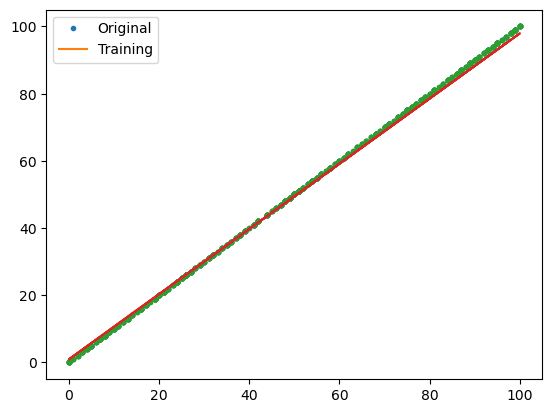

Iteration = 2, Loss = 0.2916925634867496


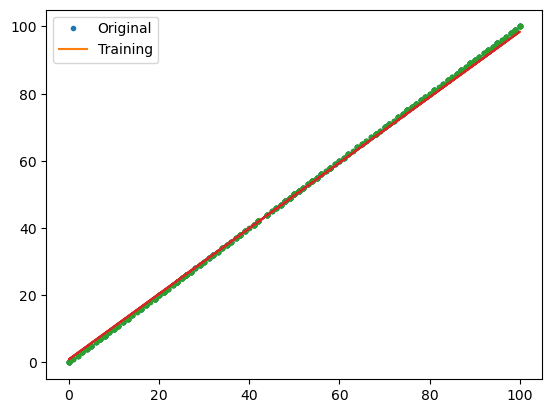

Iteration = 3, Loss = 0.19213010726033786


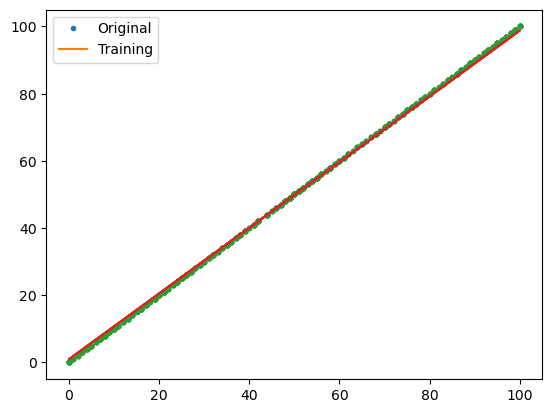

Iteration = 4, Loss = 0.14695549882739356


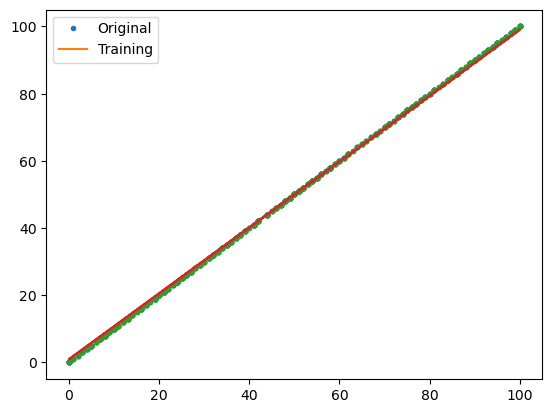

Iteration = 5, Loss = 0.12645671733227173


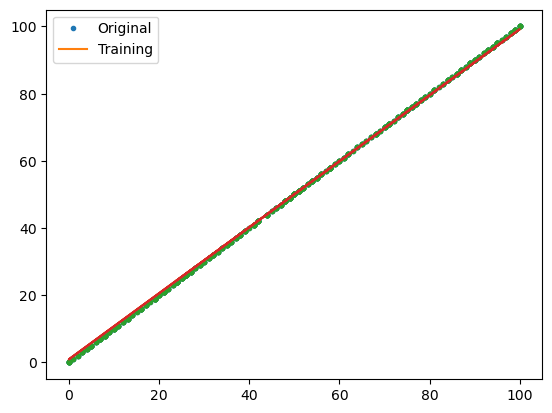

Iteration = 6, Loss = 0.11715338600251472


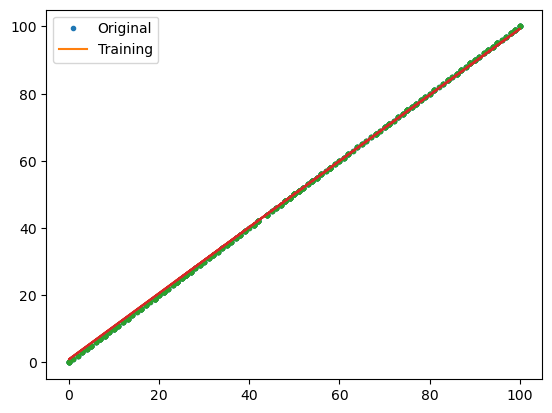

Iteration = 7, Loss = 0.11292944296501856


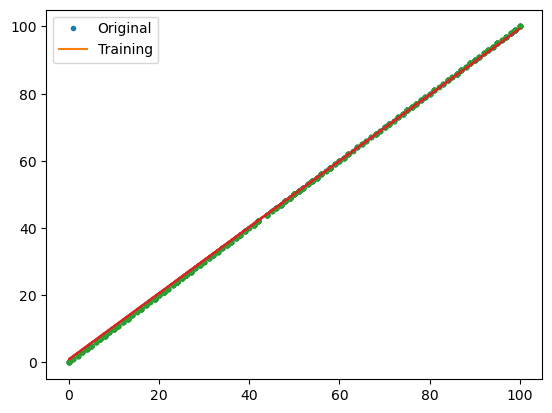

Iteration = 8, Loss = 0.11101002417355173


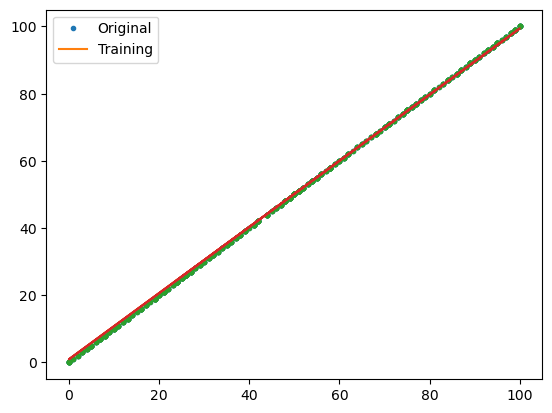

Iteration = 9, Loss = 0.11013617073677671


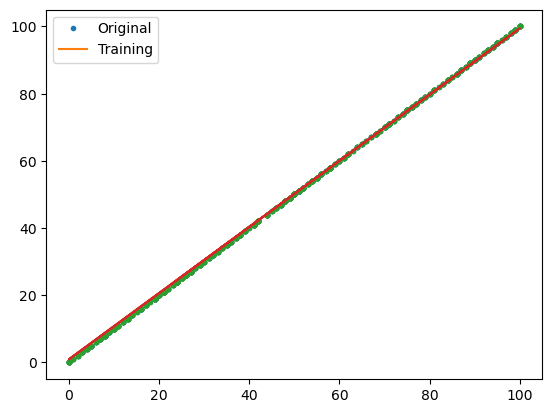

Iteration = 10, Loss = 0.10973669161121162


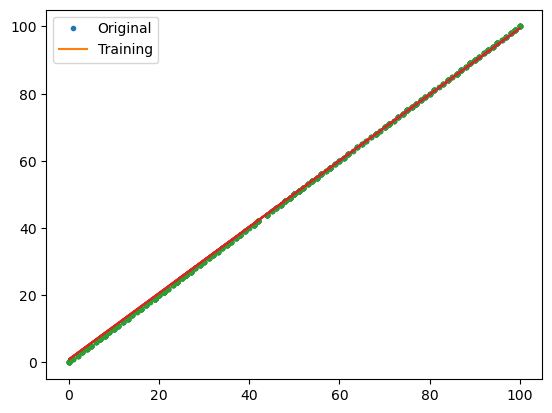

Iteration = 11, Loss = 0.10955243678774546


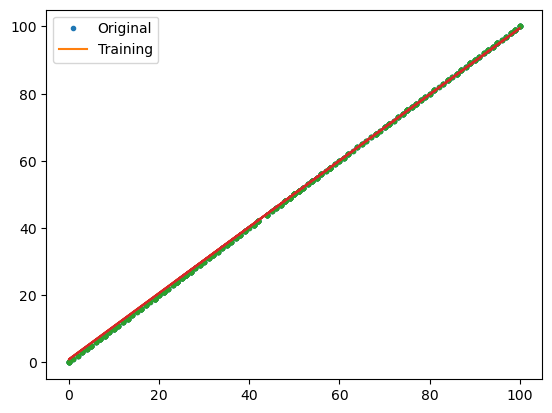

Iteration = 12, Loss = 0.10946582962019033


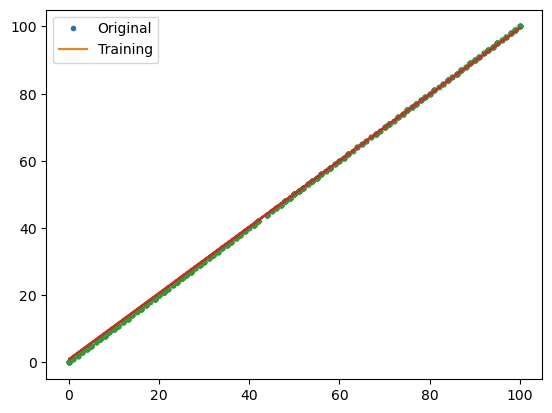

Iteration = 13, Loss = 0.10942352545393369


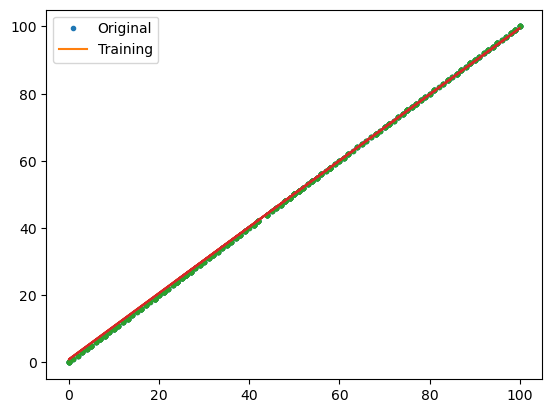

Iteration = 14, Loss = 0.10940132176008065


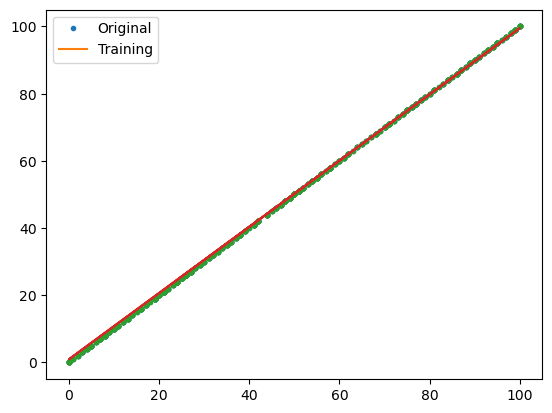

Iteration = 15, Loss = 0.10938823782445804


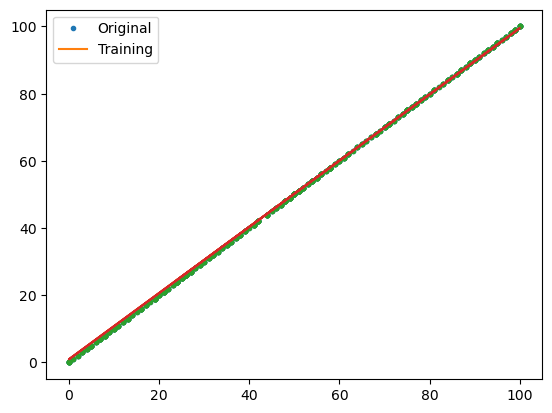

Iteration = 16, Loss = 0.10937929168487494


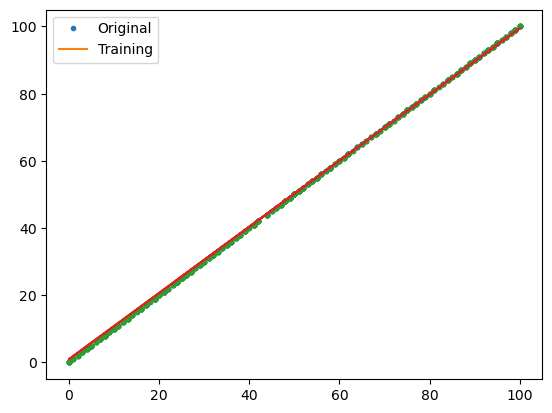

Iteration = 17, Loss = 0.10937222301955844


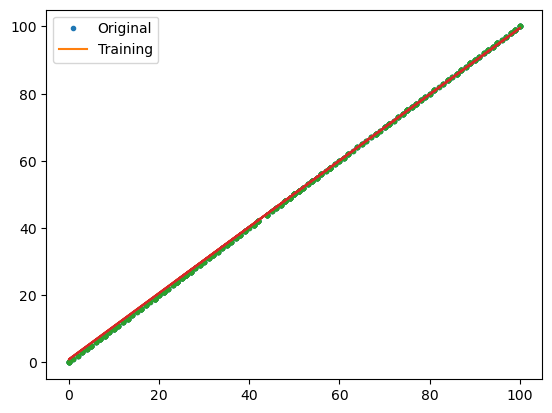

Iteration = 18, Loss = 0.10936600631800898


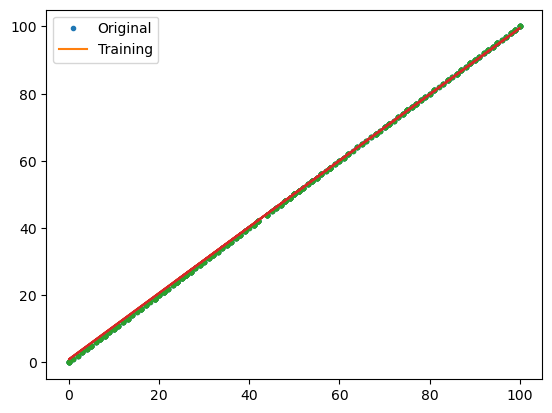

Iteration = 19, Loss = 0.10936017630496968


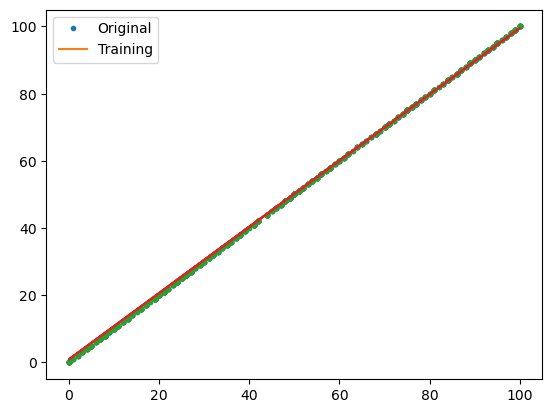

Iteration = 20, Loss = 0.10935452188453514


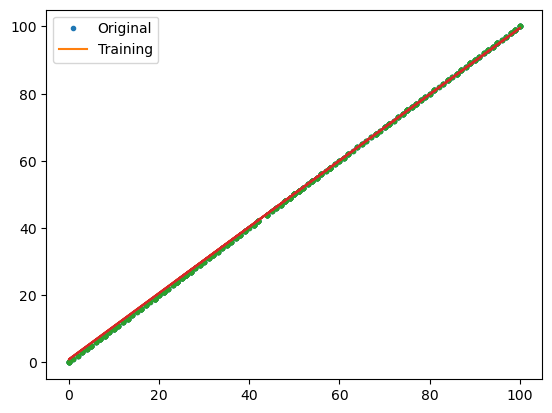

In [99]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [89]:
print(parameters)

{'m': 0.9953437614258988, 'c': 0.2925010637952969}


In [103]:
loss

[0.5111309616620477,
 0.2916925634867496,
 0.19213010726033786,
 0.14695549882739356,
 0.12645671733227173,
 0.11715338600251472,
 0.11292944296501856,
 0.11101002417355173,
 0.11013617073677671,
 0.10973669161121162,
 0.10955243678774546,
 0.10946582962019033,
 0.10942352545393369,
 0.10940132176008065,
 0.10938823782445804,
 0.10937929168487494,
 0.10937222301955844,
 0.10936600631800898,
 0.10936017630496968,
 0.10935452188453514]

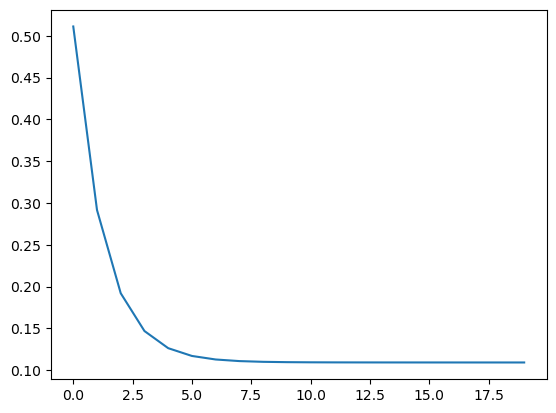

In [104]:
plt.plot(loss)

# Prediction

In [105]:
test_predictions = test_input * parameters["m"] + parameters["c"]

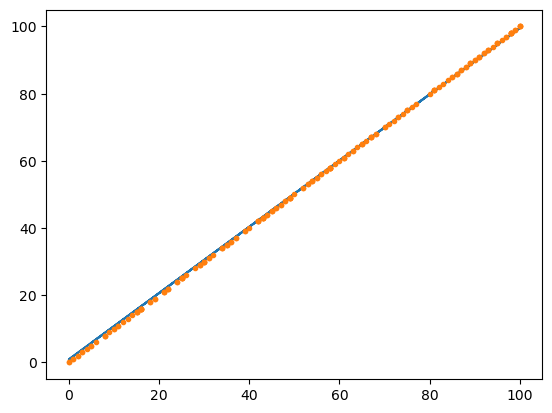

In [110]:
plt.plot(test_input, test_predictions)
plt.plot(test_input, test_output,".")
plt.show()

## Cost of predection

In [111]:
cost_function( test_output, test_predictions )

0.10770144118312719